# Sequences have full profiles in k-Seq
## import data and calculate kA

In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.switch_backend('nbAgg')
import sys

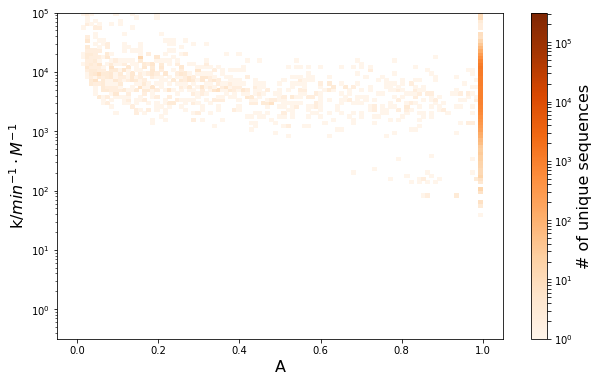

In [13]:
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(10,6))

x_edges = np.linspace(0, 1, num=100)
y_edges = np.logspace(-0.5, 5, num=100)

counts,_,_ = np.histogram2d(samples['A_avg'], samples['k_avg'], bins=(x_edges, y_edges))

plt.pcolormesh(x_edges, y_edges, counts.T, norm=LogNorm(), cmap='Oranges')
plt.clim(1,10**5.5)
plt.yscale('log')

plt.ylabel(r'k/$min^{-1}\cdot M^{-1}$', fontsize = 16)
plt.xlabel('A', fontsize = 16)
plt.xlim([-0.05, 1.05])
ax = plt.colorbar()
ax.set_label('# of unique sequences', fontsize = 16)
plt.show()
# fig.savefig('../fig/raw_data_k-vs-A_heat.jpeg', dpi=300)

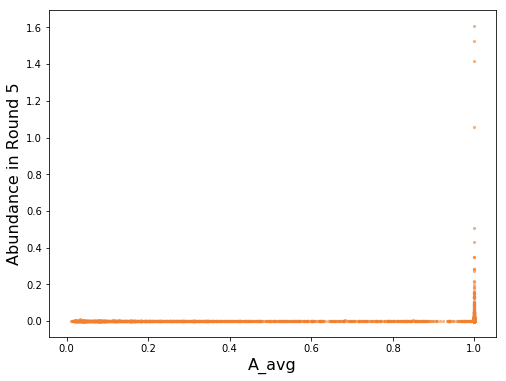

In [17]:
fig = plt.figure(figsize=(8,6))
plt.scatter(samples['A_avg'],samples['R5Abun'], alpha=0.5, facecolor='#F18030', s = 5)
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('A_avg', fontsize = 16)
plt.ylabel('Abundance in Round 5', fontsize = 16)
# plt.ylim(0.2, 10**5)
# plt.title('Catalytic activity (k) vs maximum active fraction (A),\n $10^6$ random samples from raw data', fontsize=16)
plt.show()

# fig.savefig('../fig/raw_data_k-vs-A.jpeg', dpi=300)

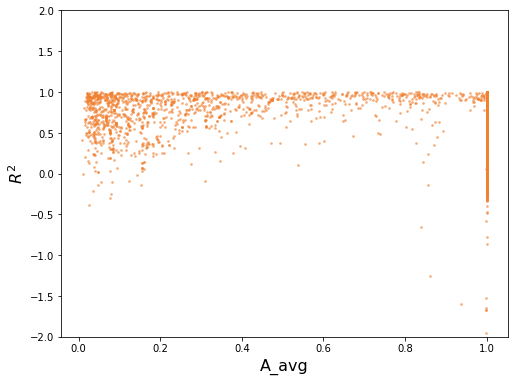

In [9]:
fig = plt.figure(figsize=(8,6))
plt.scatter(samples['A_avg'],samples['r_2'], alpha=0.5, facecolor='#F18030', s = 3)
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('A_avg', fontsize = 16)
plt.ylabel(r'$R^2$', fontsize = 16)
plt.ylim(-2, 2)
# plt.title('Catalytic activity (k) vs maximum active fraction (A),\n $10^6$ random samples from raw data', fontsize=16)
plt.show()

# fig.savefig('../fig/raw_data_k-vs-A.jpeg', dpi=300)

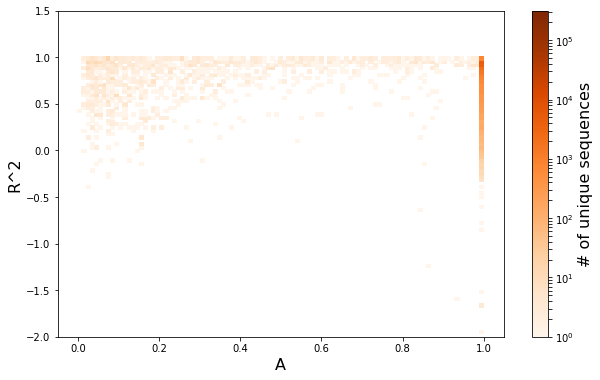

In [14]:
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(10,6))

x_edges = np.linspace(0, 1, num=100)
y_edges = np.linspace(-2.0, 1.5, num=100)

counts,_,_ = np.histogram2d(samples['A_avg'], samples['r_2'], bins=(x_edges, y_edges))

plt.pcolormesh(x_edges, y_edges, counts.T, norm=LogNorm(), cmap='Oranges')
plt.clim(1,10**5.5)

plt.ylabel(r'R^2', fontsize = 16)
plt.xlabel('A', fontsize = 16)
plt.xlim([-0.05, 1.05])
ax = plt.colorbar()
ax.set_label('# of unique sequences', fontsize = 16)
plt.show()
# fig.savefig('../fig/raw_data_k-vs-A_heat.jpeg', dpi=300)

In [7]:
plt.figure(figsize=[6,4])
bins = np.arange(0, 1, .025)
plt.hist(samples['r_2'], bins = bins, color='#F18030', rwidth=0.8, alpha = 0.6)
plt.xlabel('$R^2$')
plt.ylabel('# of seqs')
plt.savefig('/home/yuning/Work/ribozyme_pred/fig/k-seq_r^2.jpeg', dpi=300)
# plt.show()

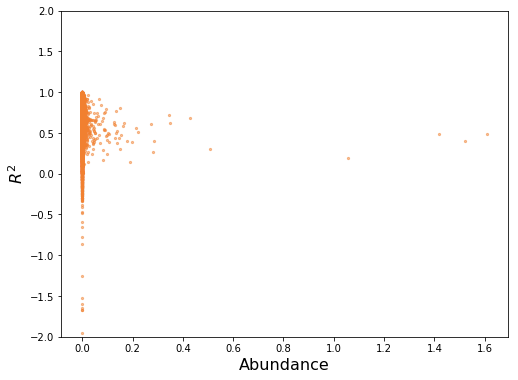

In [16]:
fig = plt.figure(figsize=(8,6))
plt.scatter(samples['R5Abun'],samples['r_2'], alpha=0.5, facecolor='#F18030', s = 5)
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Abundance', fontsize = 16)
plt.ylabel(r'$R^2$', fontsize = 16)
plt.ylim(-2, 2)
# plt.title('Catalytic activity (k) vs maximum active fraction (A),\n $10^6$ random samples from raw data', fontsize=16)
plt.show()

# fig.savefig('../fig/raw_data_k-vs-A.jpeg', dpi=300)

## Frequency distribution by k and A

In [31]:
print(samples['X'].groupby(pd.cut(samples['k by avg'],np.append([0],np.logspace(0, 6, num=7)))).count())
print('Total as %i' %len(samples.index))

k by avg
(0.0, 1.0]               8883529
(1.0, 10.0]                95852
(10.0, 100.0]             118784
(100.0, 1000.0]            15375
(1000.0, 10000.0]           7673
(10000.0, 100000.0]         2057
(100000.0, 1000000.0]         12
Name: X, dtype: int64
Total as 9123282


In [174]:
print(samples['X'].groupby(pd.cut(samples['L by avg'],[0, 0.2, 0.4, 0.6, 0.8, 0.99, 1])).count())
print('Total as %i' %len(samples.index))

L by avg
(0.0, 0.2]        6269
(0.2, 0.4]     8864431
(0.4, 0.6]       28357
(0.6, 0.8]       68548
(0.8, 0.99]      88801
(0.99, 1.0]      66876
Name: X, dtype: int64
Total as 9123282


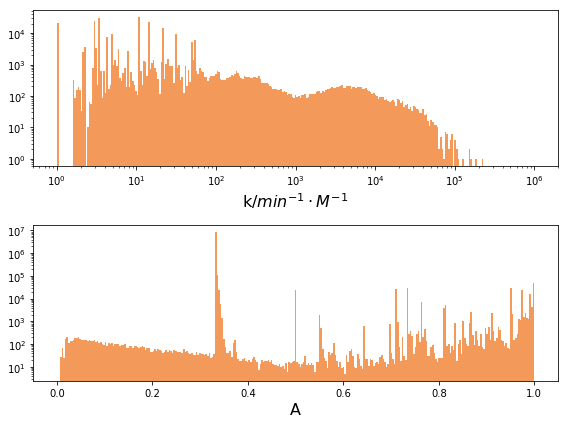

In [221]:
fig = plt.figure(figsize=[8,6])
ax1 = plt.subplot(211)
plt.hist(samples['k by avg'], bins = np.logspace(0, 6, num=300), alpha = 0.8, color='#F18030', log = True)
ax1.set_xscale('log')
ax1.set_xlabel(r'k/$min^{-1}\cdot M^{-1}$', fontsize = 16)
# ax1.set_yscale('log')

ax2 = plt.subplot(212)
plt.hist(samples['L by avg'], bins = np.linspace(0, 1, num=300), alpha = 0.8, color ='#F18030', log = True)
ax2.set_xlabel('A', fontsize = 16)

plt.tight_layout()
plt.show()

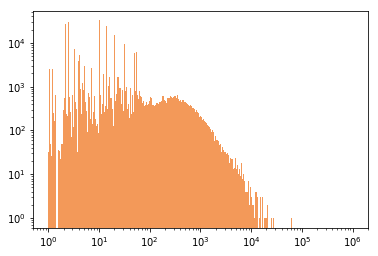

In [217]:
plt.figure()
plt.hist(samples['kL_avg'], bins = np.logspace(0, 6, num=300), alpha = 0.8, color ='#F18030', log = True)
plt.xscale('log')

## Length distribution

<IPython.core.display.Javascript object>


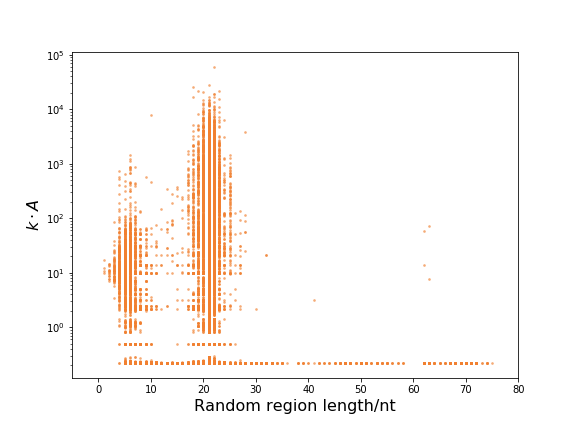

In [81]:
fig = plt.figure(figsize=(8,6))
plt.scatter(samples['seq_length'], samples['kL_avg'], alpha=0.5, facecolor='#F18030', s=3)
plt.yscale('log')
plt.xlabel('Random region length/nt', fontsize = 16)
plt.ylabel(r'$k\cdot A$', fontsize = 16)
plt.xlim([-5,80])
# plt.show()
fig.savefig('../fig/raw_data_kA-vs-length.jpeg', dpi=300)

In [155]:
print(seq_length.groupby(pd.cut(seq_length, [0, 15, 20, 21, 25, 30, 100])).count())

X
(0, 15]        220
(15, 20]      1085
(20, 21]     40247
(21, 25]      2249
(25, 30]        10
(30, 100]        2
Name: X, dtype: int64


In [3]:
samples.shape

(9123282, 9)

# Filter sample with higher confidence

## filter by k, A, kA

In [4]:
k_cutoff = 50
sample_cut_k = samples.loc[samples['k by avg'] > k_cutoff]
print('sample cut off by k > %i : %s' %(k_cutoff, sample_cut_k.shape))
print()

A_cutoff = 0.98
sample_cut_A = samples.loc[samples['L by avg'] < A_cutoff]
print('sample cut off by A < %r : %s' %(A_cutoff, sample_cut_A.shape))

kA_cutoff = 5.00
sample_cut_kA = samples.loc[samples['kL_avg'] > kA_cutoff]
print('sample cut off by kA > %r: %s' %(kA_cutoff, sample_cut_kA.shape))

sample_filtered = sample_cut_k.loc[sample_cut_k['L by avg'] < A_cutoff]
print(sample_filtered.shape)

print(sample_cut_k.loc[sample_cut_k['kL_avg'] > 5.35].shape)

sample cut off by k > 50 : (43813, 9)

sample cut off by A < 0.98 : (9051619, 9)
sample cut off by kA > 5.0: (153140, 9)
(10949, 9)
(43813, 9)


## filtered seq distribution

<IPython.core.display.Javascript object>


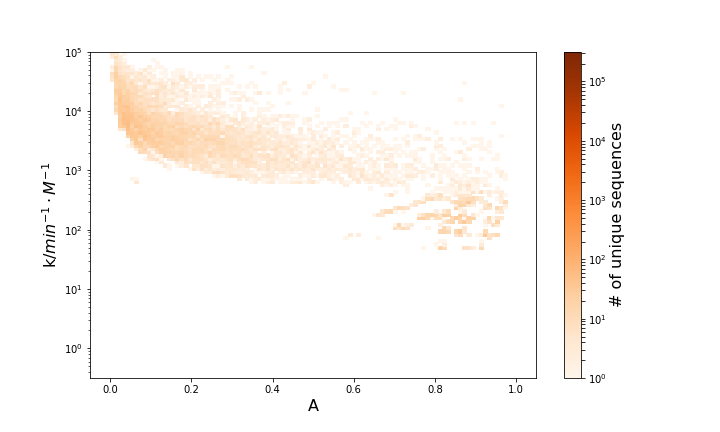

In [75]:
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(10,6))

x_edges = np.linspace(0, 1, num=100)
y_edges = np.logspace(-0.5, 5, num=100)

counts,_,_ = np.histogram2d(sample_filtered['L by avg'], sample_filtered['k by avg'], bins=(x_edges, y_edges))

plt.pcolormesh(x_edges, y_edges, counts.T, norm=LogNorm(), cmap='Oranges')
plt.clim(1,10**5.5)
plt.yscale('log')

plt.ylabel(r'k/$min^{-1}\cdot M^{-1}$', fontsize = 16)
plt.xlabel('A', fontsize = 16)
plt.xlim([-0.05, 1.05])
ax = plt.colorbar()
ax.set_label('# of unique sequences', fontsize = 16)
# plt.show()
fig.savefig('../fig/filtered_data_k-vs-A_heat.jpeg', dpi=300)

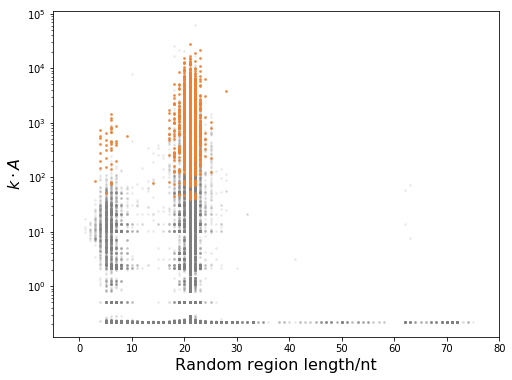

In [15]:
fig = plt.figure(figsize=(8,6))

plt.scatter(samples['seq_length'], samples['kL_avg'], alpha=0.1, facecolor='#807F80', s=3, label='sample')
plt.scatter(sample_filtered['seq_length'], sample_filtered['kL_avg'], alpha=0.8, facecolor='#F18030', s=3, label='labled sample')
plt.yscale('log')
plt.xlabel('Random region length/nt', fontsize = 16)
plt.ylabel(r'$k\cdot A$', fontsize = 16)
plt.xlim([-5,80])
# plt.ylim([10**(-0.5),10**5.1])
plt.show()
fig.savefig('../fig/filtered_data_kA-vs-length.jpeg', dpi=300)

In [15]:
14155/9123282

0.0015515249884855034

# Standard deviation estimation

In [32]:
import pickle

dirc = '/home/yuning/Work/ribozyme_pred/data/k_seq/labeled_count_table_non_empty_in_r5_INT_STD.pkl'

with open(dirc, 'rb') as readFile:
    countTable = pickle.load(readFile)


rndsToAvg = [[1, 2, 3, 4, 5, 6],
             [7, 8, 10, 11, 12],
             [13, 14, 15],
             [19, 20, 21, 23]]

seqCountRnds = []
counter = [[0 for _ in range(6)] for i in range(4)]
counter_min = [[0 for _ in range(6)] for i in range(4)]

for seq in countTable:
    seqCountRnds.append([seq[0], seq[1], [0, 0, 0, 0]])
    for ix, rndBatch in enumerate(rndsToAvg):
        seqCountRnds[-1][2][ix] = sum([1 for rnd in rndBatch if seq[1][rnd] != 0])
    try:
        counter[seq[-1]-1][max(seqCountRnds[-1][2])-1] +=1
        counter_min[seq[-1]-1][min(seqCountRnds[-1][2])-1] +=1
    except:
        print(seq[-1]-1, max(seqCountRnds[-1][2])-1)

In [33]:
counter_min

[[0, 0, 0, 0, 0, 322990],
 [0, 0, 0, 0, 0, 44775],
 [0, 0, 0, 0, 0, 12625],
 [7395, 4709, 11407, 0, 0, 0]]